# C3 Simulator as a backend for Qiskit Experiments

This notebook demonstrates the use of the C3 Simulator with a high-level quantum programming framework [Qiskit](https://www.qiskit.org). You must additionally install qiskit and matplotlib to run this example.

In [1]:
#!pip install qiskit matplotlib

In [2]:
from c3.qiskit import C3Provider
from qiskit import transpile, execute, QuantumCircuit, Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city

## Define a basic circuit to make a Bell State

In [3]:
qc = QuantumCircuit(6, 6)
qc.x(0)
qc.cx(0,1)
qc.measure([0, 1], [0, 1])

In [4]:
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
q_2: ───────────╫──╫─
                ║  ║ 
q_3: ───────────╫──╫─
                ║  ║ 
q_4: ───────────╫──╫─
                ║  ║ 
q_5: ───────────╫──╫─
                ║  ║ 
c: 6/═══════════╩══╩═
                0  1

## Get the C3 Provider and Backend

In [5]:
c3_provider = C3Provider()
c3_backend = c3_provider.get_backend("c3_qasm_simulator")

In [6]:
config = c3_backend.configuration()

print("Name: {0}".format(config.backend_name))
print("Version: {0}".format(config.backend_version))
print("Max Qubits: {0}".format(config.n_qubits))
print("OpenPulse Support: {0}".format(config.open_pulse))
print("Basis Gates: {0}".format(config.basis_gates))

Name: c3_qasm_simulator
Version: 0.1
Max Qubits: 15
OpenPulse Support: False
Basis Gates: ['u3', 'cx', 'id', 'x']


### Let's view how the Qiskit Transpiler will convert the circuit

In [7]:
trans_qc = transpile(qc, c3_backend)

In [8]:
trans_qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
q_2: ───────────╫──╫─
                ║  ║ 
q_3: ───────────╫──╫─
                ║  ║ 
q_4: ───────────╫──╫─
                ║  ║ 
q_5: ───────────╫──╫─
                ║  ║ 
c: 6/═══════════╩══╩═
                0  1

## Run a physics based simulation job

This is compute intensive and will take time to finish.

In [9]:
c3_backend.set_device_config("quickstart.hjson")
c3_backend.set_simulation_type("physics")
c3_job = execute(qc, c3_backend, shots=1000)
result = c3_job.result()

In [10]:
res_counts = result.get_counts(qc)
print(res_counts)

{'000000': 164, '010000': 799, '100000': 14}


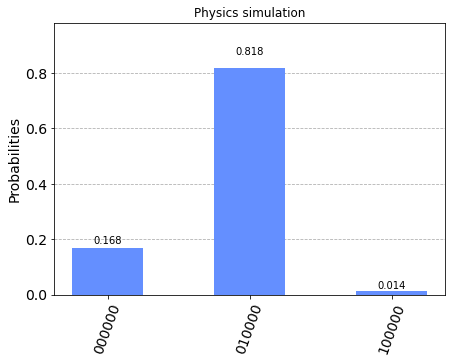

In [11]:
plot_histogram(res_counts, title='Physics simulation')

## Run an Ideal devices Simulation

In [12]:
c3_backend.set_simulation_type("perfect")
c3_job = execute(qc, c3_backend, shots=1000)
result = c3_job.result()

In [13]:
res_counts = result.get_counts(qc)
print(res_counts)

{'000000': 250, '000001': 250, '000010': 250, '000011': 250}


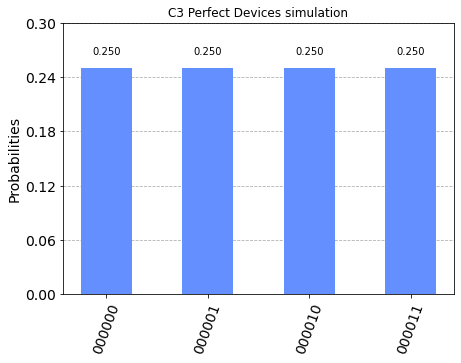

In [14]:
plot_histogram(res_counts, title='C3 Perfect Devices simulation')

## Run Simulation and verify results on Qiskit simulator

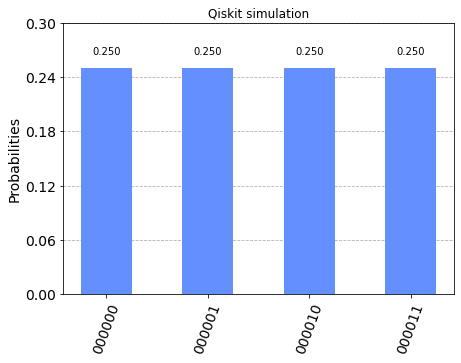

In [15]:
qiskit_simulator = Aer.get_backend('qasm_simulator')
qiskit_result = execute(qc, qiskit_simulator, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Qiskit simulation')